# Online news popularity data preprocessing

In [1]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from scipy.stats import rankdata, norm
pd.set_option('display.max_columns', 70)

In [2]:
# Take a look at the Online News Popularity dataset
news_df = pd.read_csv('./OnlineNewsPopularity.csv')
news_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,

### Shares - target, other columns - features

In [3]:
# Looking through the information about news dataset (looking for empty values)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
# We can drop url feature as this feature is categorical and it hasn't any information
news_df.drop('url', axis=1, inplace=True)
news_df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374

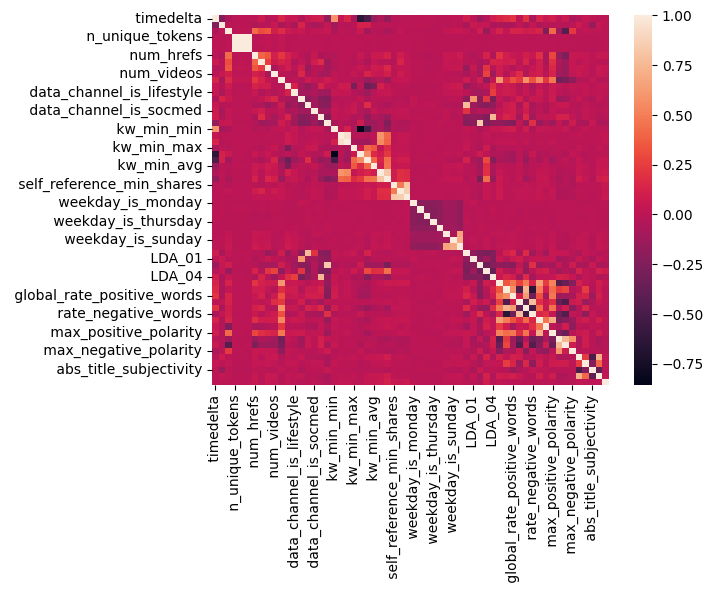

In [5]:
# Looking for correlated fatures
sns.heatmap(news_df.corr())
plt.show()

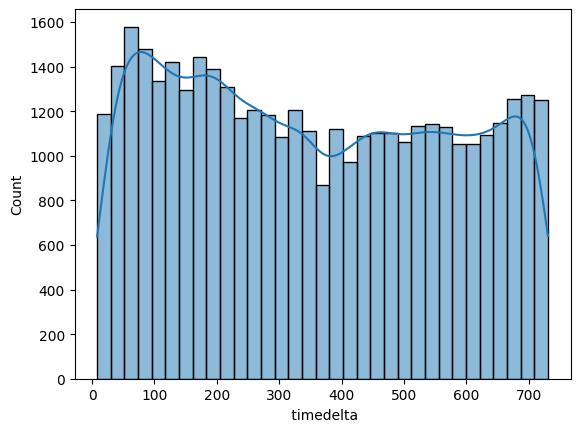

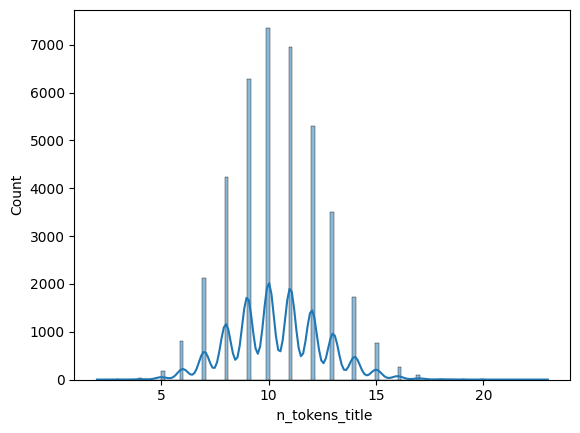

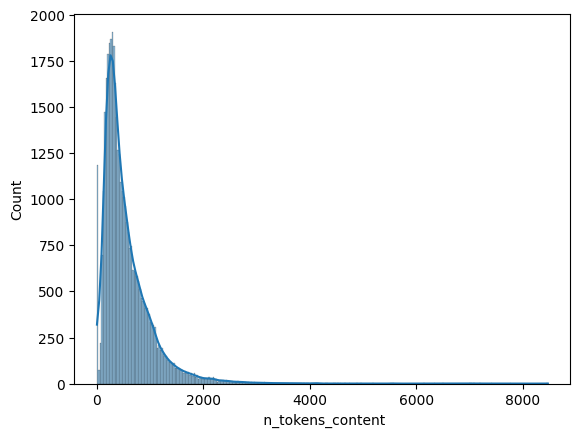

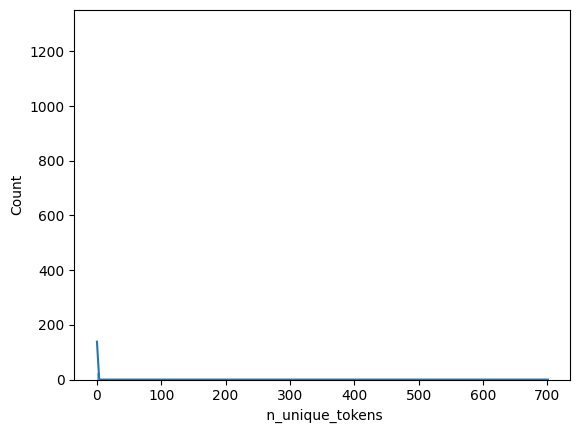

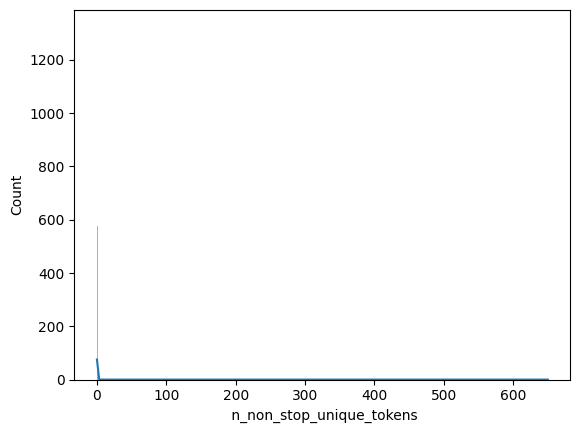

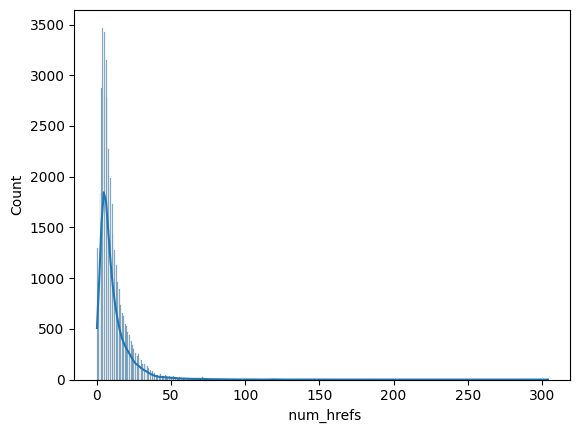

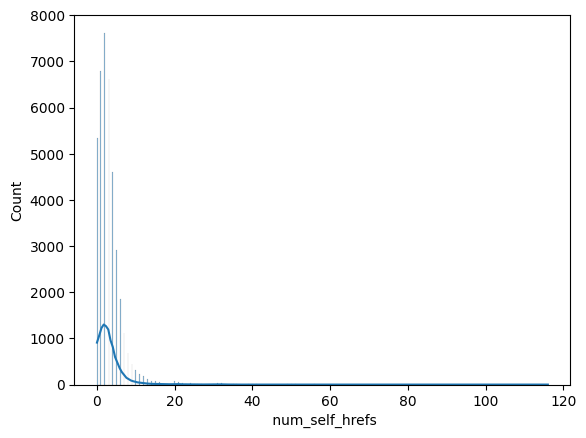

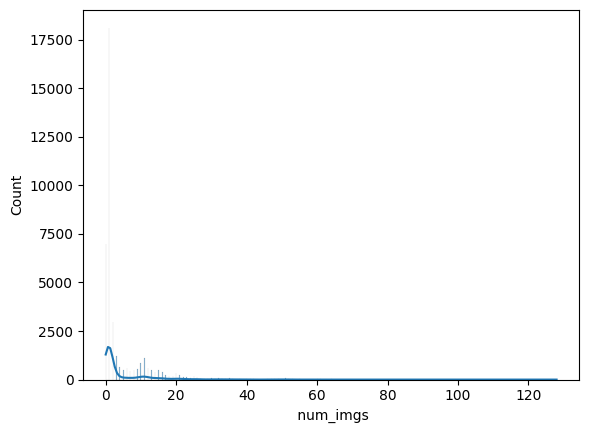

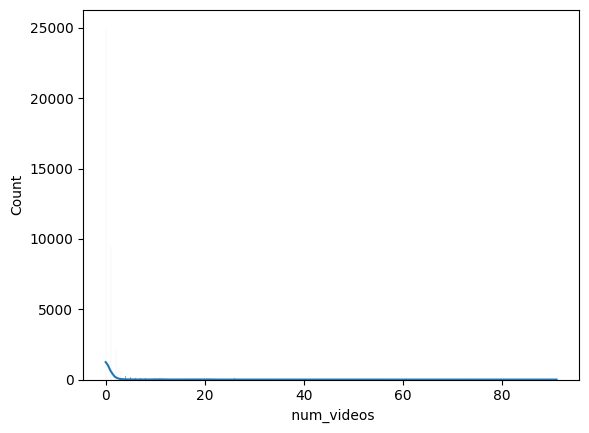

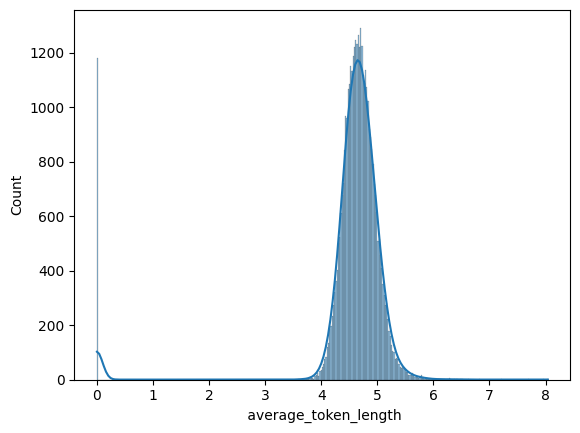

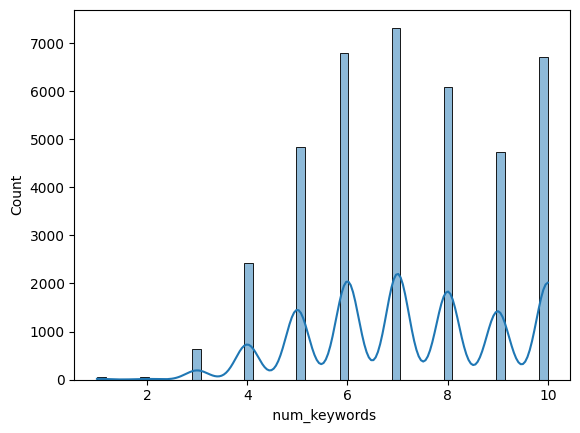

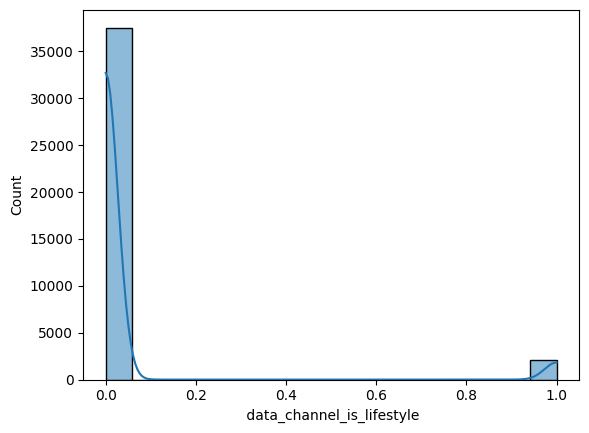

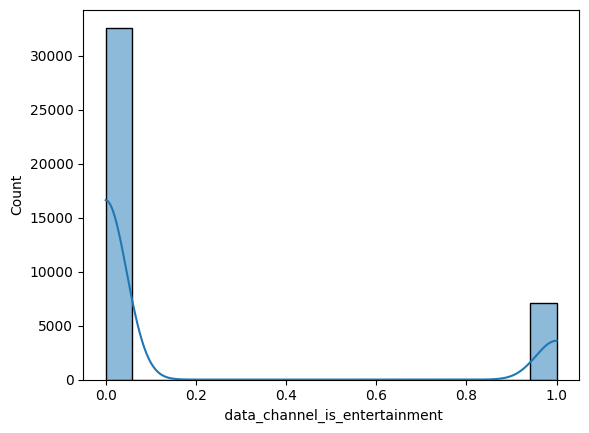

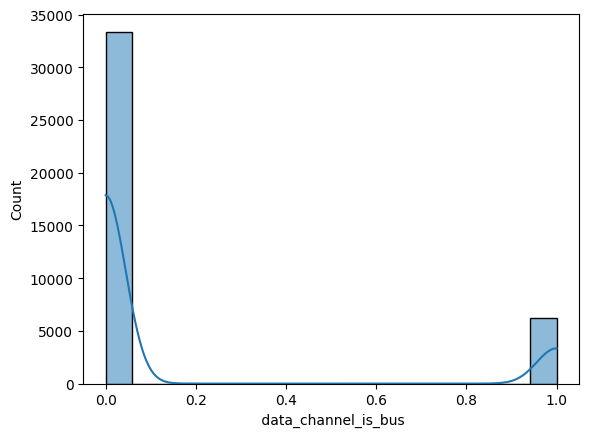

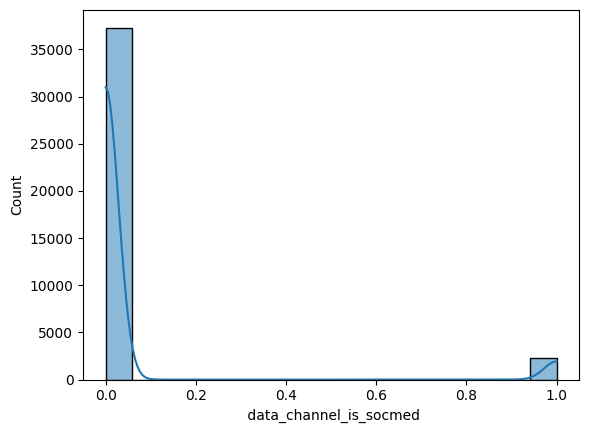

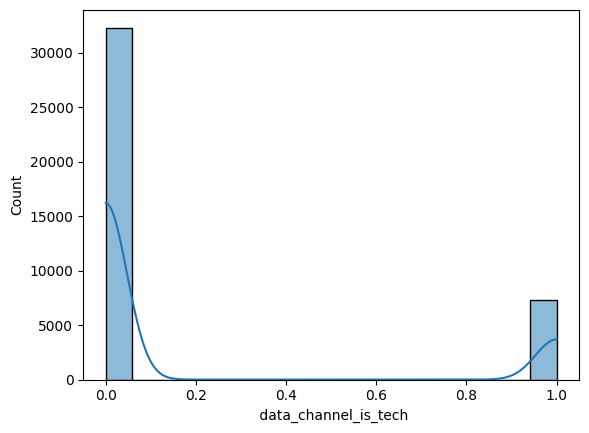

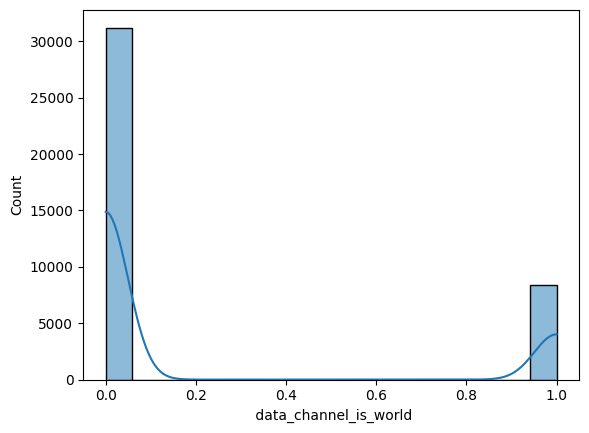

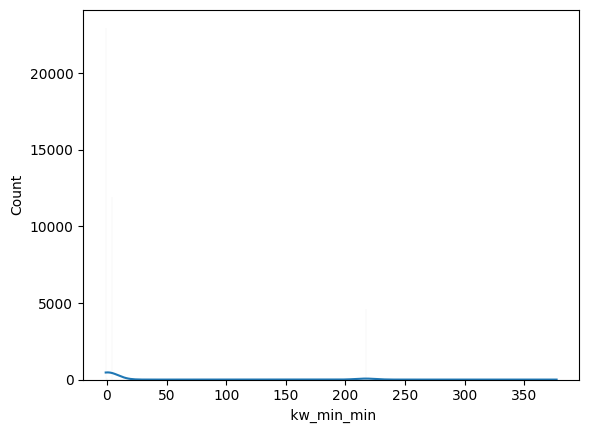

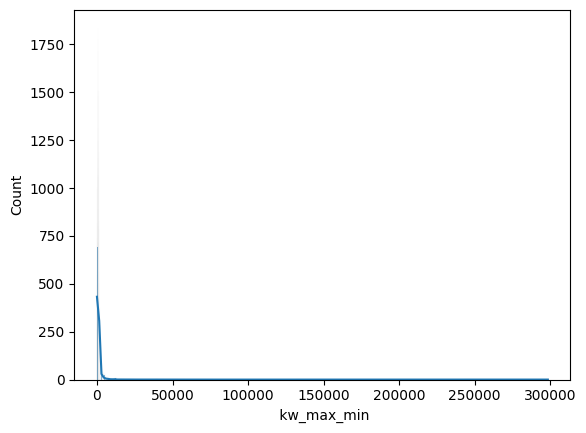

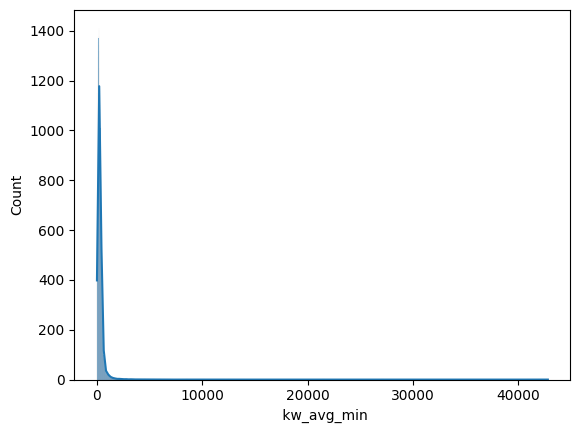

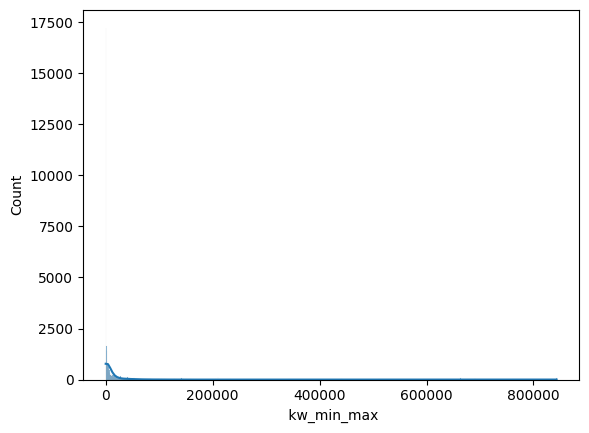

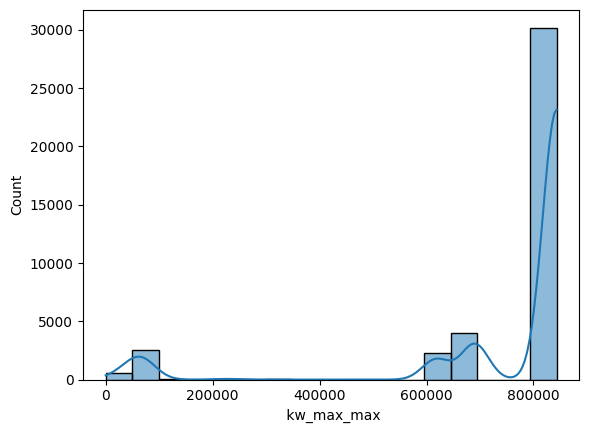

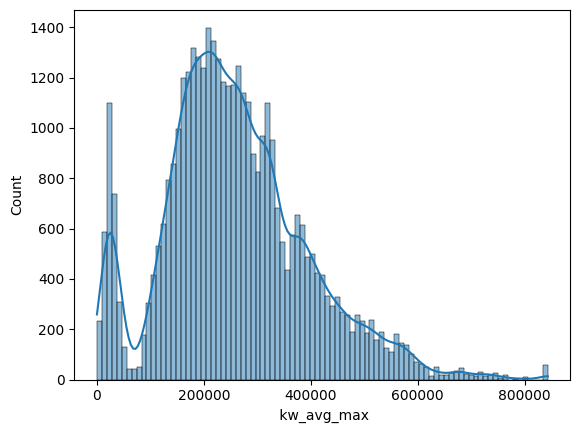

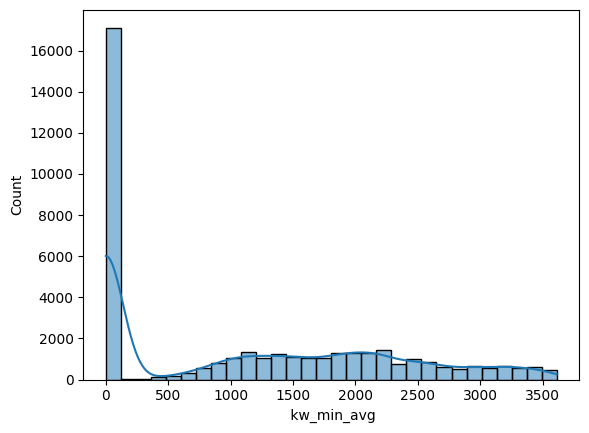

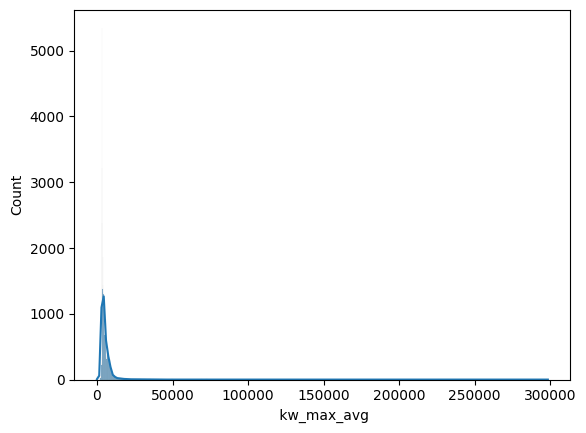

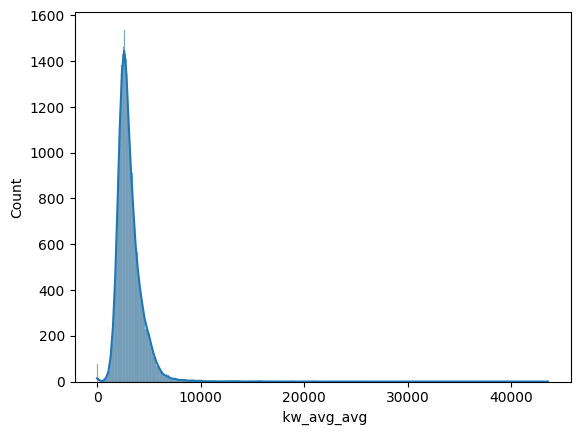

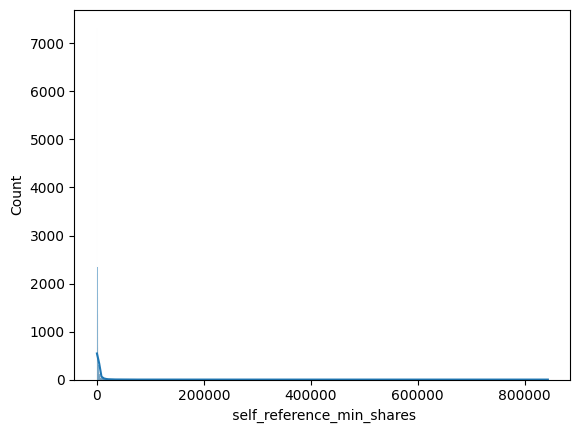

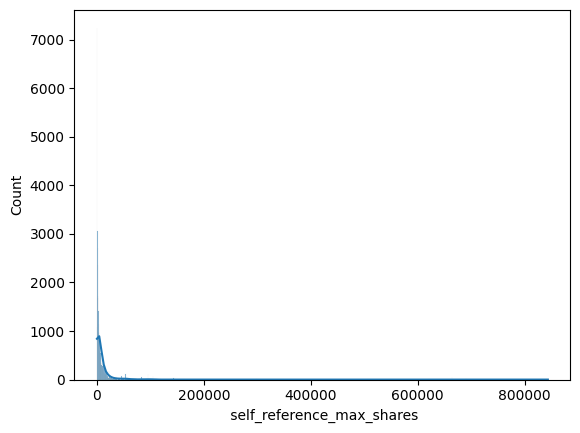

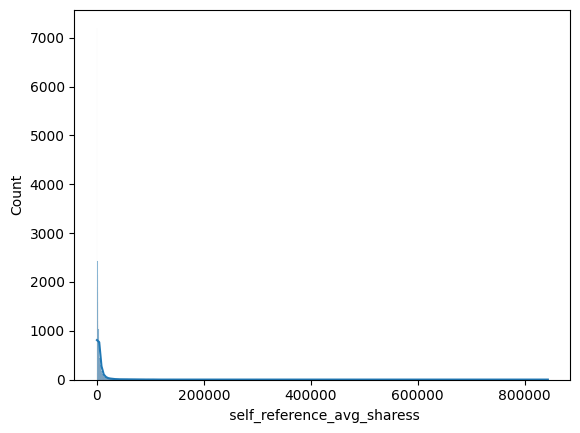

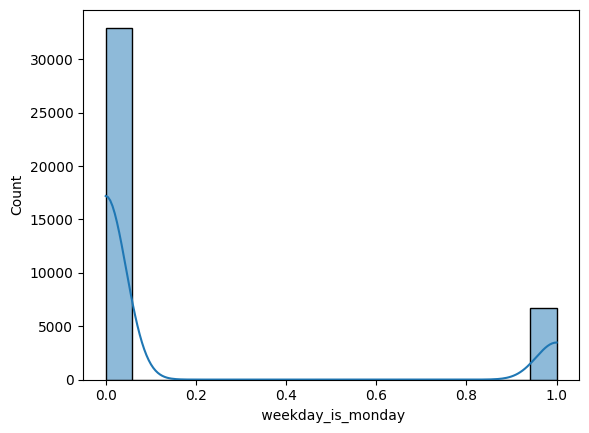

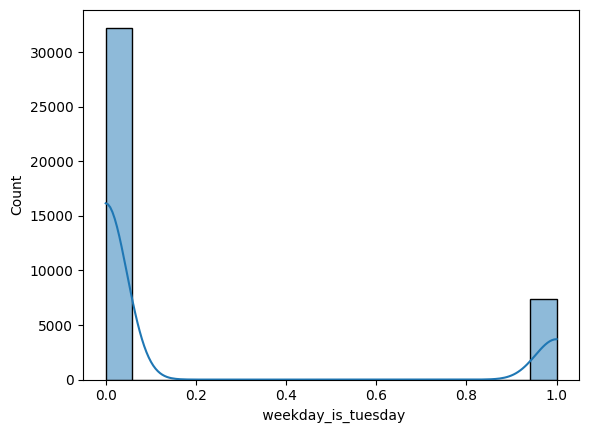

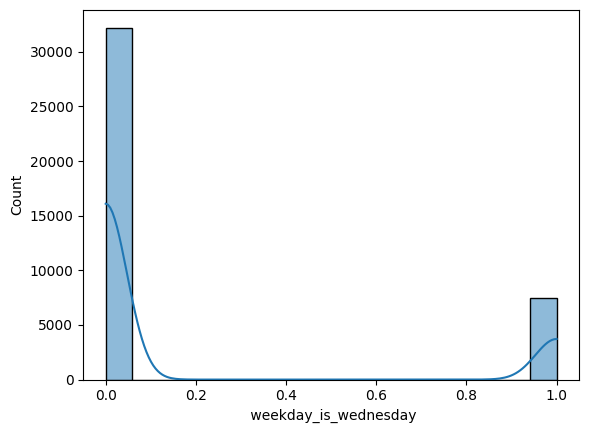

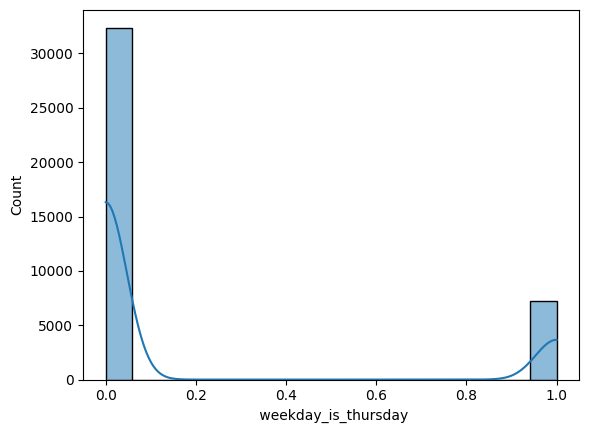

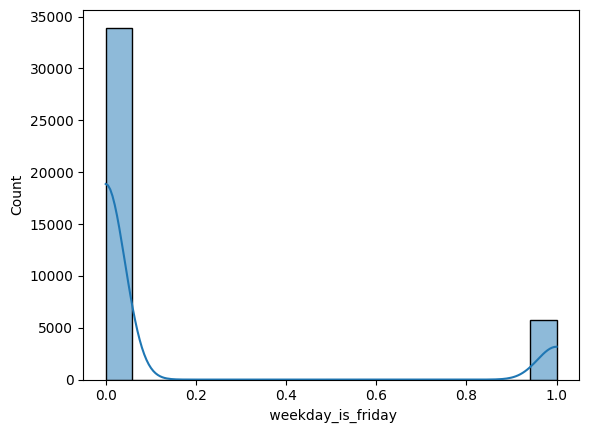

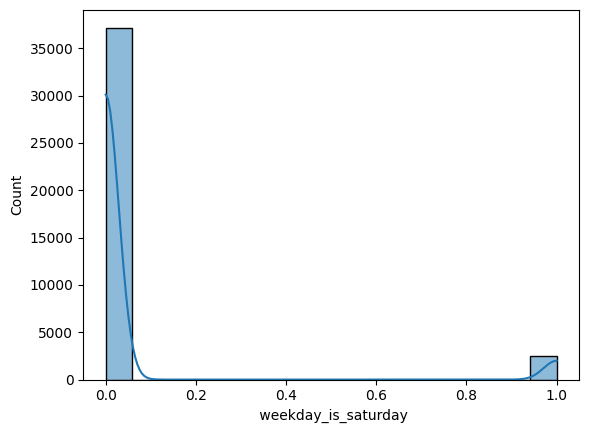

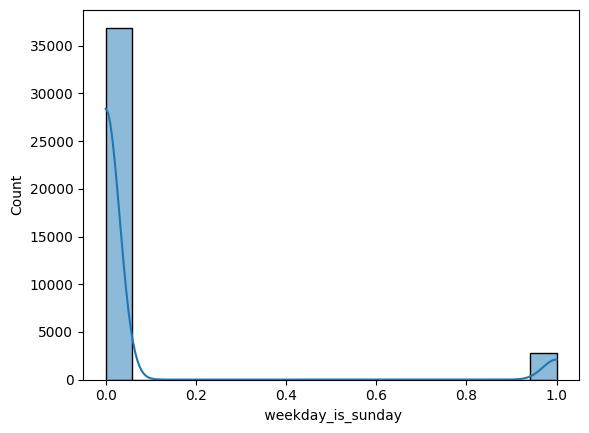

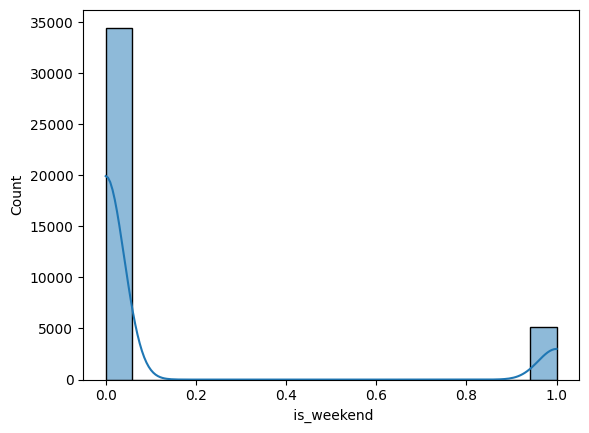

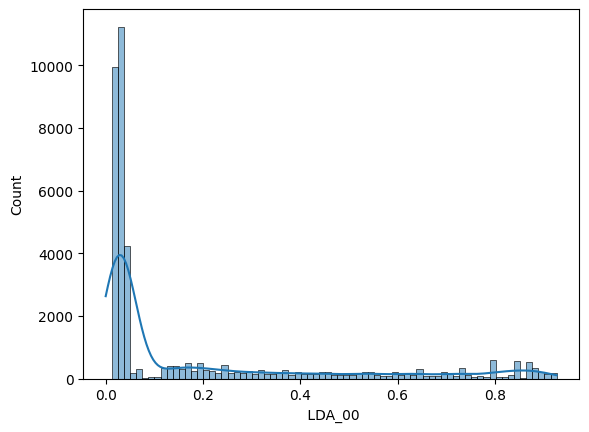

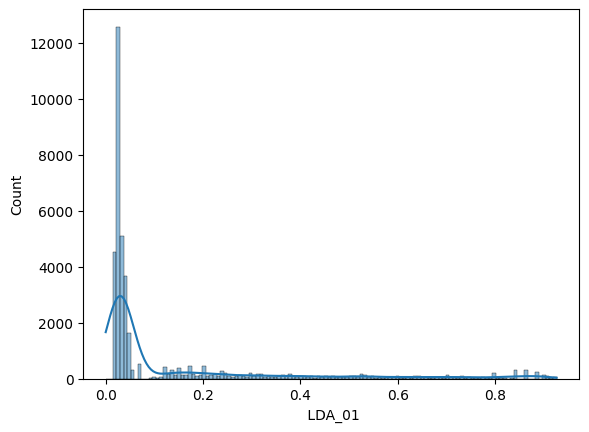

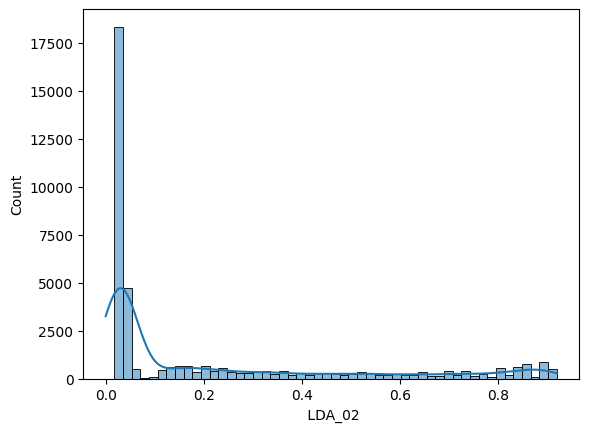

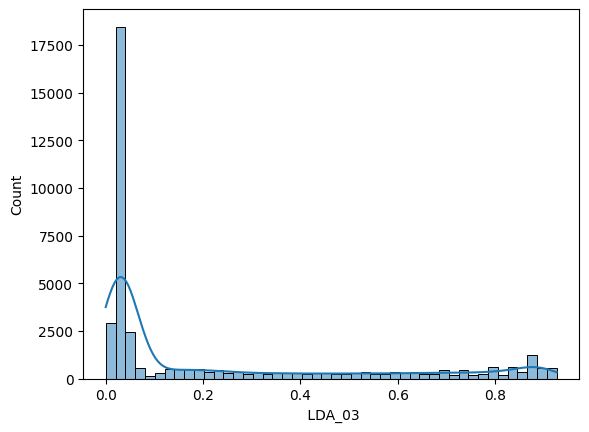

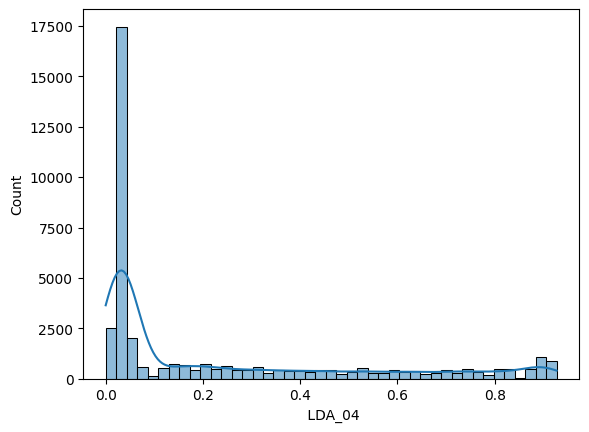

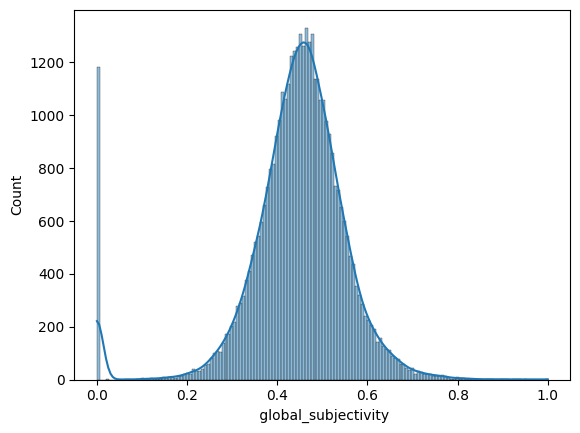

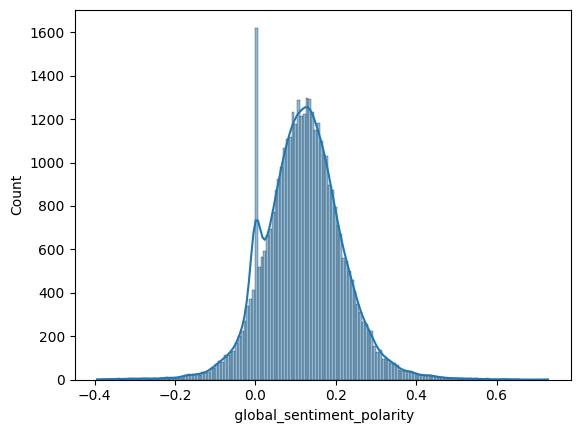

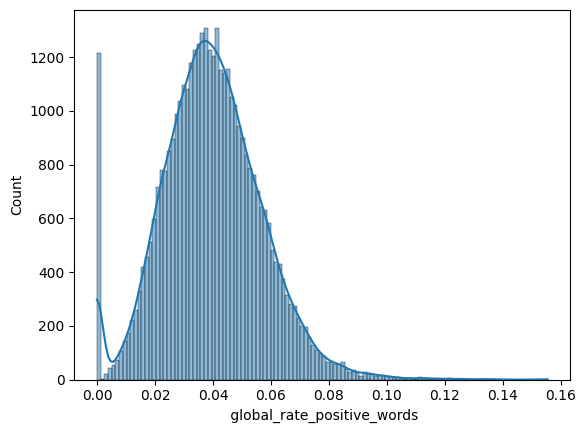

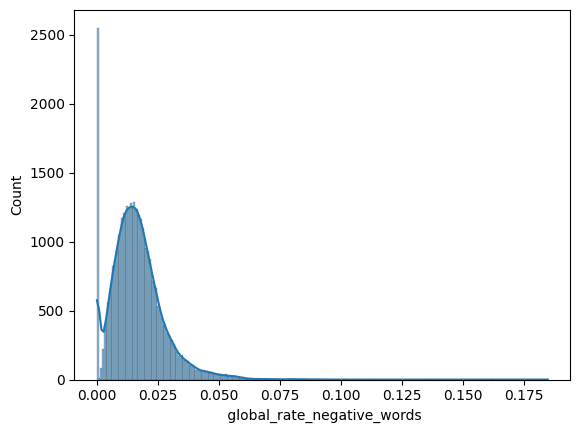

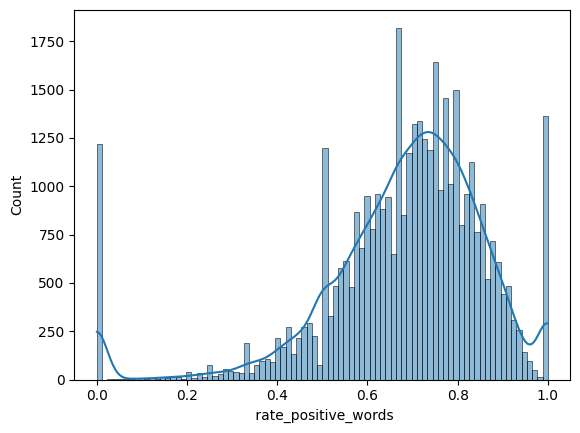

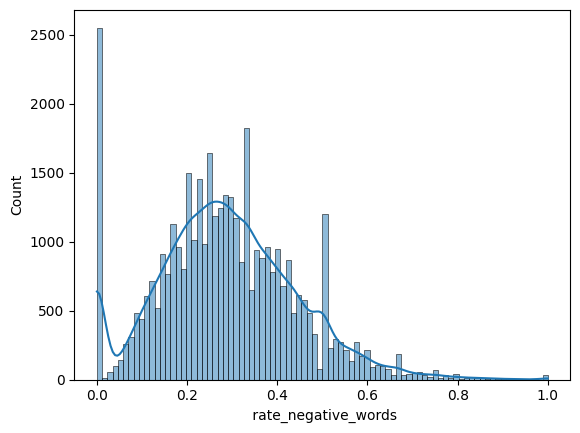

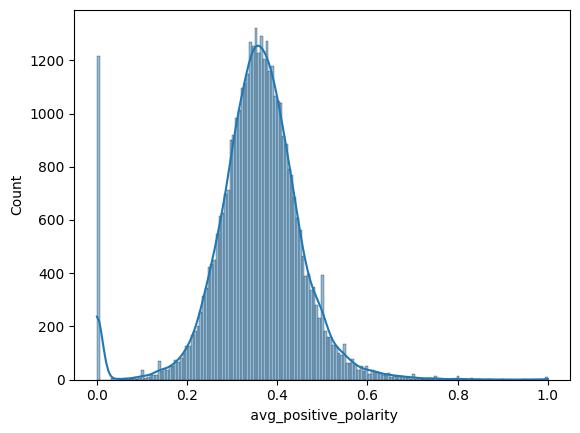

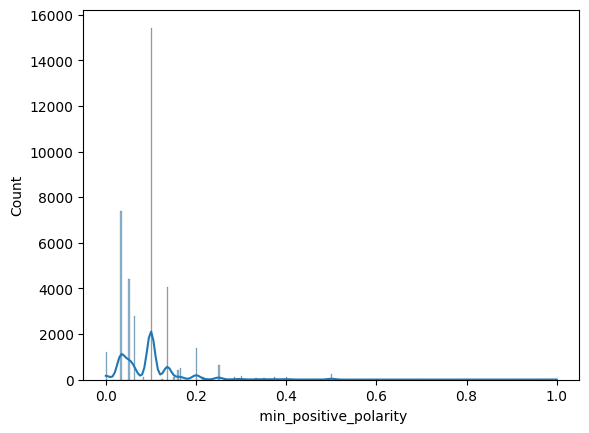

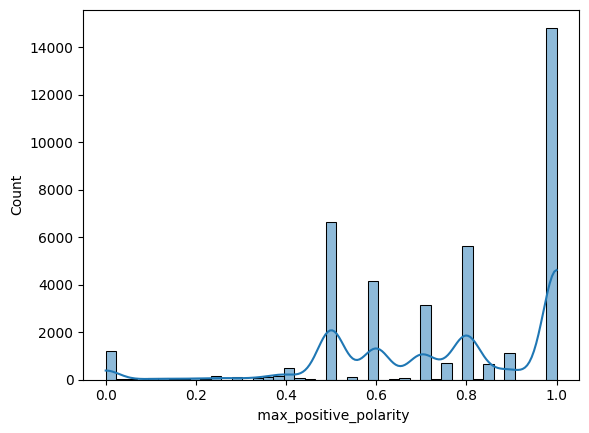

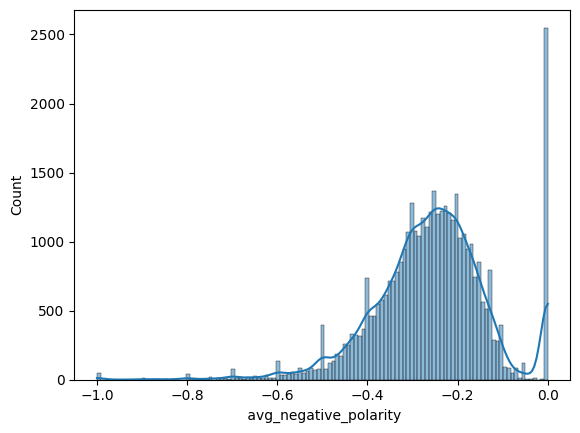

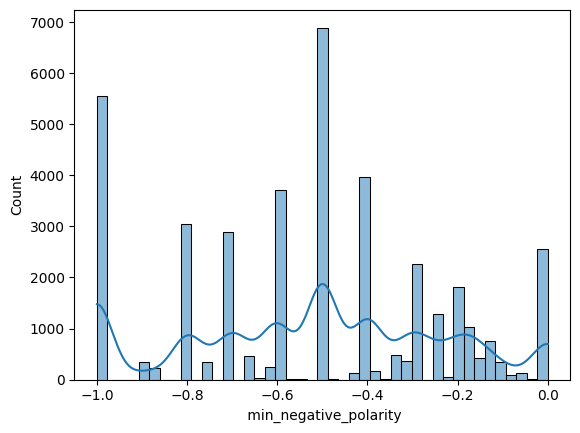

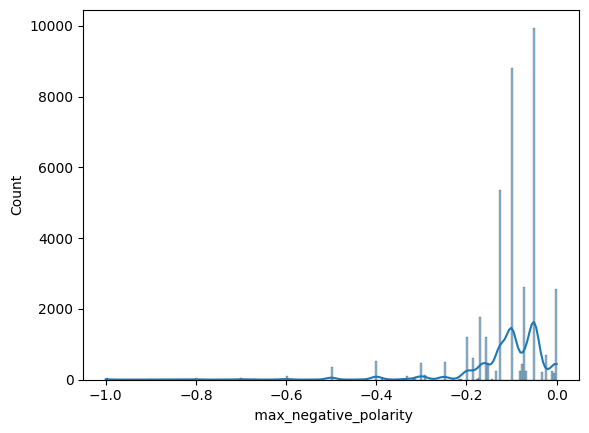

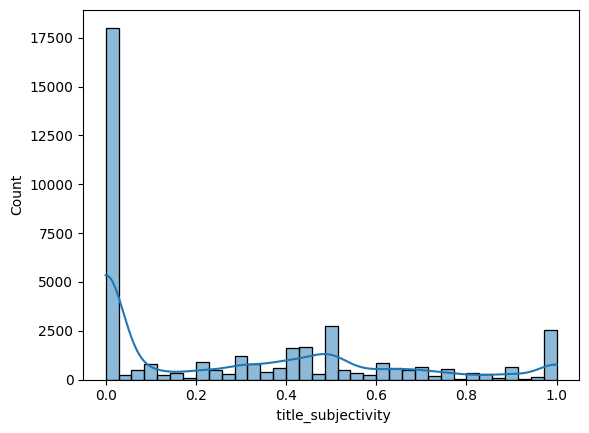

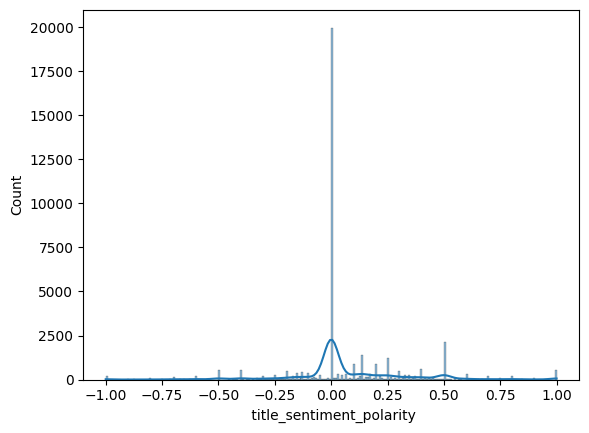

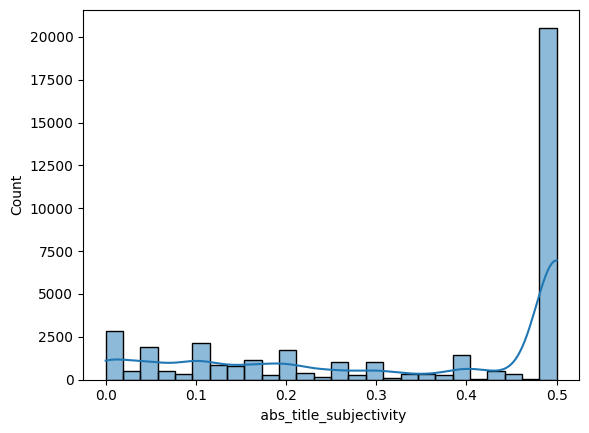

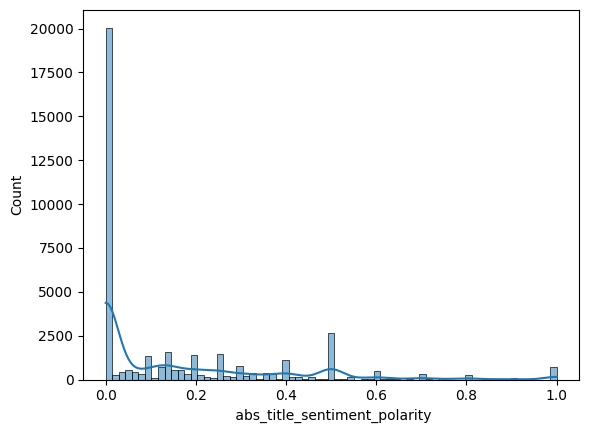

In [72]:
# Looking at the distributions of the features
features = list(news_df.columns)
features.remove(' shares')

features_num = list(range(0, len(features)))
features_num.remove(4)

for num in features_num:
    sns.histplot(news_df[features[num]], kde=True)
    plt.show()

In [73]:
# Create function for perform a rank-based transformation
def rank_transform(x):
    ranks = rankdata(x, method='average')
    return norm.ppf((ranks - 0.5) / len(ranks))

# Create a function for finding an optimal transformation method
def find_optimal_transformation(df, col):
    transformations = {
        'original': df[col],
        'log': np.log10(df[col]),
        'sqrt': np.sqrt(df[col]),
        'cbrt': np.cbrt(df[col]),
        'reciprocal': 1 / (df[col] + 1e-9),
        'rank': rank_transform(df[col]),
    }

    try:
        transformations['boxcox'], _ = stats.boxcox(df[col] + 1)
    except ValueError:
        pass

    pt = PowerTransformer(method='yeo-johnson')
    transformations['yeojohnson'] = pt.fit_transform(df[[col]]).flatten()

    # Using the Shapiro-Wilk criterion
    # results = {name: shapiro(trans)[1] for name, trans in transformations.items()}
    
    # Or use the Kolmogorov-Smirnov test
    results = {name: kstest(trans, 'norm')[1] for name, trans in transformations.items()}

    # Returning the transformation with the highest p-value
    optimal_transformation = max(results, key=results.get)
    return optimal_transformation, transformations[optimal_transformation]


In [75]:
# Creating a new dataframe for normalized values
transformed_df = pd.DataFrame()

# In a cycle apply the best transformation method and save it's values
for feature in features:
    optimal_transformation, transformed_values = find_optimal_transformation(news_df, feature)
    if optimal_transformation != 'original':
        transformed_df[f'{optimal_transformation}({feature})'] = transformed_values
    else:
        transformed_df[feature] = transformed_values
    print(f'The most optimal transformation for {feature} is {optimal_transformation}')

The most optimal transformation for  timedelta is rank
The most optimal transformation for  n_tokens_title is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  n_tokens_content is rank
The most optimal transformation for  n_unique_tokens is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  n_non_stop_words is rank
The most optimal transformation for  n_non_stop_unique_tokens is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  num_hrefs is rank
The most optimal transformation for  num_self_hrefs is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  num_imgs is original
The most optimal transformation for  num_videos is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  average_token_length is rank
The most optimal transformation for  num_keywords is rank
The most optimal transformation for  data_channel_is_lifestyle is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  data_channel_is_entertainment is original
The most optimal transformation for  data_channel_is_bus is original
The most optimal transformation for  data_channel_is_socmed is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/cor

The most optimal transformation for  data_channel_is_tech is original
The most optimal transformation for  data_channel_is_world is original
The most optimal transformation for  kw_min_min is original
The most optimal transformation for  kw_max_min is rank
The most optimal transformation for  kw_avg_min is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  kw_min_max is original
The most optimal transformation for  kw_max_max is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  kw_avg_max is rank
The most optimal transformation for  kw_min_avg is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  kw_max_avg is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  kw_avg_avg is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  self_reference_min_shares is rank
The most optimal transformation for  self_reference_max_shares is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  self_reference_avg_sharess is rank
The most optimal transformation for  weekday_is_monday is original
The most optimal transformation for  weekday_is_tuesday is original
The most optimal transformation for  weekday_is_wednesday is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  weekday_is_thursday is original
The most optimal transformation for  weekday_is_friday is original
The most optimal transformation for  weekday_is_saturday is original
The most optimal transformation for  weekday_is_sunday is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  is_weekend is original
The most optimal transformation for  LDA_00 is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  LDA_01 is rank
The most optimal transformation for  LDA_02 is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  LDA_03 is rank
The most optimal transformation for  LDA_04 is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  global_subjectivity is rank
The most optimal transformation for  global_sentiment_polarity is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  global_rate_positive_words is rank
The most optimal transformation for  global_rate_negative_words is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  rate_positive_words is rank
The most optimal transformation for  rate_negative_words is rank


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  avg_positive_polarity is rank
The most optimal transformation for  min_positive_polarity is original
The most optimal transformation for  max_positive_polarity is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


The most optimal transformation for  avg_negative_polarity is rank
The most optimal transformation for  min_negative_polarity is rank
The most optimal transformation for  max_negative_polarity is original
The most optimal transformation for  title_subjectivity is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core

The most optimal transformation for  title_sentiment_polarity is original
The most optimal transformation for  abs_title_subjectivity is original
The most optimal transformation for  abs_title_sentiment_polarity is original


/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pavel/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [76]:
transformed_df

,rank( timedelta),rank( n_tokens_title),rank( n_tokens_content),rank( n_unique_tokens),rank( n_non_stop_words),rank( n_non_stop_unique_tokens),rank( num_hrefs),rank( num_self_hrefs),num_imgs,num_videos,rank( average_token_length),rank( num_keywords),data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,rank( kw_max_min),rank( kw_avg_min),kw_min_max,kw_max_max,rank( kw_avg_max),kw_min_avg,rank( kw_max_avg),rank( kw_avg_avg),rank( self_reference_min_shares),rank( self_reference_max_shares),rank( self_reference_avg_sharess),weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,rank( LDA_00),rank( LDA_01),rank( LDA_02),rank( LDA_03),rank( LDA_04),rank( global_subjectivity),rank( global_sentiment_polarity),rank( global_rate_positive_words),rank( global_rate_negative_words),rank( rate_positive_words),rank( rate_negative_words),rank( avg_positive_polarity),min_positive_polarity,max_positive_polarity,rank( avg_negative_polarity),rank( min_negative_polarity),max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,3.091313,0.746312,-0.830751,1.171875,-0.859076,1.250329,-0.773700,-0.247319,1.0,0.0,0.060832,-1.077791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.809729,-0.897243,-0.895353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.011874,1.107189,0.003762,0.133906,-0.019697,0.834551,-0.299737,0.407371,-0.186943,0.425334,-0.344559,0.257404,0.100000,0.70,-0.840613,-0.309042,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,3.091313,-0.627749,-0.629945,0.636396,-0.682170,1.037852,-1.082209,-0.770293,1.0,0.0,0.874264,-1.654145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-1.337803,-1.337726,-1.337803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506066,0.481113,0.164789,0.215657,0.071541,-1.206170,0.345029,0.255150,0.038674,0.167738,-0.092096,-0.900984,0.033333,0.70,1.303623,1.355812,-0.100000,0.000000,0.000000,0.500000,0.000000
2,3.091313,-0.627749,-0.877419,0.346405,-0.977397,-0.284000,-1.082209,-0.770293,1.0,0.0,-0.983430,-0.561454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.314418,-0.753138,-0.722589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628018,-0.102896,-0.194219,-0.319837,1.102533,2.439542,2.017790,1.034661,-0.690612,1.106431,-0.977397,1.564511,0.100000,1.00,-1.637609,-0.868165,-0.133333,0.000000,0.000000,0.500000,0.000000
3,3.091313,-0.627749,0.309539,-0.344123,0.321434,-0.264207,0.207090,-1.494860,1.0,0.0,-0.947209,-0.086922,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-1.337803,-1.337726,-1.337803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.437130,1.172315,0.875191,-0.392816,-0.811837,-0.291810,-0.208737,0.150161,0.574307,-0.284132,0.363172,0.351546,0.136364,0.80,-0.984764,-0.309042,-0.166667,0.000000,0.000000,0.500000,0.000000
4,3.091313,1.191898,1.253929,-1.200952,1.406604,-1.358432,1.046996,2.268357,20.0,0.0,0.069322,-0.086922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.768720,1.144183,0.294747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.314651,-0.220448,-0.531720,-0.626094,1.680026,0.738234,1.686806,1.934743,-0.367261,1.143818,-1.009924,0.671991,0.033333,1.00,0.327633,0.032505,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-3.716757,0.299307,-0.208059,-0.100354,-0.394045,-0.060357,0.207090,1.378593,1.0,1.0,-0.507837,0.343989,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.024409,-0.424676,26900.0,843300.0,0.911184,2514.742857,-0.200666,0.179677,

In [77]:
# Take a target column from intial dataset
shares_column = news_df[' shares']

# Insert target column into transformed dataset
transformed_df.insert(59, ' shares', shares_column, True)
transformed_df

,rank( timedelta),rank( n_tokens_title),rank( n_tokens_content),rank( n_unique_tokens),rank( n_non_stop_words),rank( n_non_stop_unique_tokens),rank( num_hrefs),rank( num_self_hrefs),num_imgs,num_videos,rank( average_token_length),rank( num_keywords),data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,rank( kw_max_min),rank( kw_avg_min),kw_min_max,kw_max_max,rank( kw_avg_max),kw_min_avg,rank( kw_max_avg),rank( kw_avg_avg),rank( self_reference_min_shares),rank( self_reference_max_shares),rank( self_reference_avg_sharess),weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,rank( LDA_00),rank( LDA_01),rank( LDA_02),rank( LDA_03),rank( LDA_04),rank( global_subjectivity),rank( global_sentiment_polarity),rank( global_rate_positive_words),rank( global_rate_negative_words),rank( rate_positive_words),rank( rate_negative_words),rank( avg_positive_polarity),min_positive_polarity,max_positive_polarity,rank( avg_negative_polarity),rank( min_negative_polarity),max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,3.091313,0.746312,-0.830751,1.171875,-0.859076,1.250329,-0.773700,-0.247319,1.0,0.0,0.060832,-1.077791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.809729,-0.897243,-0.895353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.011874,1.107189,0.003762,0.133906,-0.019697,0.834551,-0.299737,0.407371,-0.186943,0.425334,-0.344559,0.257404,0.100000,0.70,-0.840613,-0.309042,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,3.091313,-0.627749,-0.629945,0.636396,-0.682170,1.037852,-1.082209,-0.770293,1.0,0.0,0.874264,-1.654145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-1.337803,-1.337726,-1.337803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506066,0.481113,0.164789,0.215657,0.071541,-1.206170,0.345029,0.255150,0.038674,0.167738,-0.092096,-0.900984,0.033333,0.70,1.303623,1.355812,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,3.091313,-0.627749,-0.877419,0.346405,-0.977397,-0.284000,-1.082209,-0.770293,1.0,0.0,-0.983430,-0.561454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.314418,-0.753138,-0.722589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628018,-0.102896,-0.194219,-0.319837,1.102533,2.439542,2.017790,1.034661,-0.690612,1.106431,-0.977397,1.564511,0.100000,1.00,-1.637609,-0.868165,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,3.091313,-0.627749,0.309539,-0.344123,0.321434,-0.264207,0.207090,-1.494860,1.0,0.0,-0.947209,-0.086922,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-1.337803,-1.337726,-1.337803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.437130,1.172315,0.875191,-0.392816,-0.811837,-0.291810,-0.208737,0.150161,0.574307,-0.284132,0.363172,0.351546,0.136364,0.80,-0.984764,-0.309042,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,3.091313,1.191898,1.253929,-1.200952,1.406604,-1.358432,1.046996,2.268357,20.0,0.0,0.069322,-0.086922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.314162,-2.013451,0.0,0.0,-3.091313,0.000000,-3.091313,-3.091313,-0.768720,1.144183,0.294747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.314651,-0.220448,-0.531720,-0.626094,1.680026,0.738234,1.686806,1.934743,-0.367261,1.143818,-1.009924,0.671991,0.033333,1.00,0.327633,0.032505,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-3.716757,0.299307,-0.208059,-0.100354,-0.394045,-0.060357,0.207090,1.378593,1.0,1.0,-0.507837,0.343989,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.024409,-0.424676,26900.0,843300.0,0.91118

In [79]:
# Save transformed dataset as .csv file
transformed_df.to_csv('prep_news_data.csv', index=False)

### Now the dataset has no empty values and categorical features; all features are approximately independent and all featrues' distributions are approximately normal